In [ ]:
!wget https://github.com/akanametov/CycleGAN/releases/download/1.0/horse2zebra.zip

In [ ]:
!unzip horse2zebra.zip

In [1]:
import torch
from torch import nn
from torchvision import transforms
torch.manual_seed(0)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import random
from pathlib import Path

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [2]:
trainA = sorted(Path('./apple2orange/trainA').rglob('*.jpg'))
trainB = sorted(Path('./apple2orange/trainB').rglob('*.jpg'))

In [3]:
from data.utils import DataSet
from torch.utils.data import DataLoader

In [4]:
transform = transforms.Compose([
     transforms.Resize((286, 286)),
     transforms.RandomCrop((256, 256)),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]),
])

dataset = DataSet(trainA, trainB, transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [5]:
dimA = 3
dimB = 3
hid_dim=16
out_dim=1

lr = 0.0001
batch_size = 1

In [6]:
from model import Generator, Discriminator
from model.utils import initialize_weights
from trainer import ConcatParameters
from utils import GeneratorLoss, DiscriminatorLoss

In [7]:
generatorAB = Generator(in_channels=dimA,
                        hid_channels=hid_dim,
                        out_channels=dimB).apply(initialize_weights).to(device)

generatorBA = Generator(in_channels=dimB,
                        hid_channels=hid_dim,
                        out_channels=dimA).apply(initialize_weights).to(device)

g_optimizer = torch.optim.Adam(ConcatParameters(generatorAB.parameters(),
                                                generatorBA.parameters()),
                               lr=lr, betas=(0.5, 0.999))

discriminatorB = Discriminator(in_channels=dimB,
                               hid_channels=hid_dim,
                               out_channels=1).apply(initialize_weights).to(device)

dB_optimizer = torch.optim.Adam(discriminatorB.parameters(),
                                lr=lr, betas=(0.5, 0.999))

discriminatorA = Discriminator(in_channels=dimA,
                               hid_channels=hid_dim,
                               out_channels=1).apply(initialize_weights).to(device)

dA_optimizer = torch.optim.Adam(discriminatorA.parameters(),
                                lr=lr, betas=(0.5, 0.999))

In [8]:
g_criterion = GeneratorLoss()
d_criterion = DiscriminatorLoss()

In [9]:
from trainer import Trainer

In [10]:
params = {
    'generatorAB': generatorAB,
    'generatorBA': generatorBA,
    'g_criterion': g_criterion,
    'g_optimizer': g_optimizer,
    'discriminatorB': discriminatorB,
    'discriminatorA': discriminatorA,
    'd_criterion': d_criterion,
    'dB_optimizer': dB_optimizer,
    'dA_optimizer': dA_optimizer,
    'device': device
}

In [11]:
trainer = Trainer(**params)

In [12]:
train_params={
    'dataloader': dataloader,
    'epochs': 10, 
    'display_step': 200,
    'device': device
}

  0%|          | 0/995 [00:00<?, ?it/s]

:::::::::::::::::  Epoch 10  :::::::::::::::::
::::::::::::::::  Iteration 9000  :::::::::::::::
::::::::::: Generator loss: 7.06148 :::::::::::
::::::::: Discriminator loss: 0.62307 :::::::::


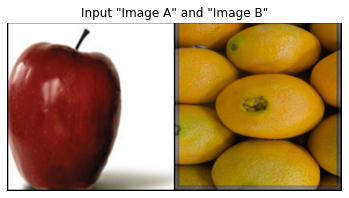

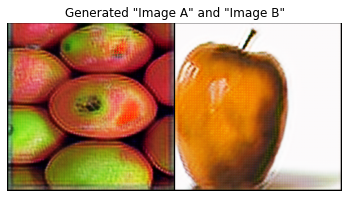

:::::::::::::::::  Epoch 10  :::::::::::::::::
::::::::::::::::  Iteration 9200  :::::::::::::::
::::::::::: Generator loss: 7.22922 :::::::::::
::::::::: Discriminator loss: 0.61272 :::::::::


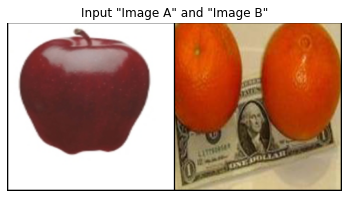

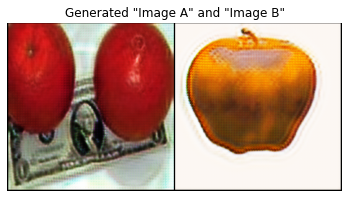

:::::::::::::::::  Epoch 10  :::::::::::::::::
::::::::::::::::  Iteration 9400  :::::::::::::::
::::::::::: Generator loss: 7.11989 :::::::::::
::::::::: Discriminator loss: 0.61224 :::::::::


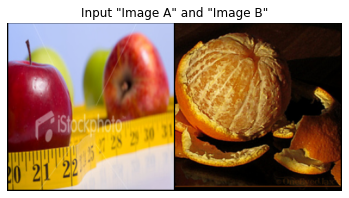

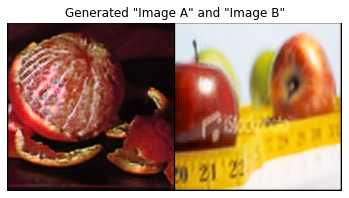

:::::::::::::::::  Epoch 10  :::::::::::::::::
::::::::::::::::  Iteration 9600  :::::::::::::::
::::::::::: Generator loss: 6.96212 :::::::::::
::::::::: Discriminator loss: 0.62376 :::::::::


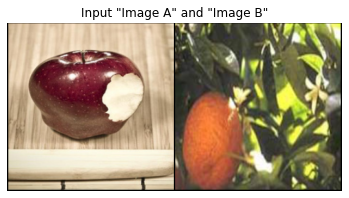

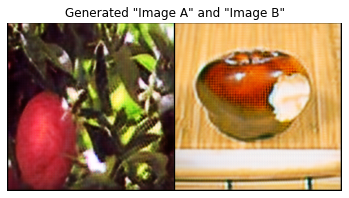

:::::::::::::::::  Epoch 10  :::::::::::::::::
::::::::::::::::  Iteration 9800  :::::::::::::::
::::::::::: Generator loss: 6.93514 :::::::::::
::::::::: Discriminator loss: 0.62534 :::::::::


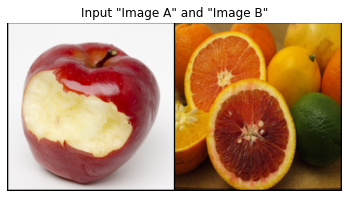

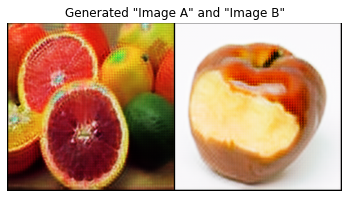

In [13]:
trainer.fit(**train_params)

In [14]:
history = trainer.data.copy()

In [15]:
import pandas as pd

df = pd.DataFrame.from_dict(history)
#df.to_csv('history_apple2orange.csv', index=False)

In [16]:
data = trainer.data.copy()
g_loss = data['gloss']
d_loss = data['dloss']
iters = data['iter']

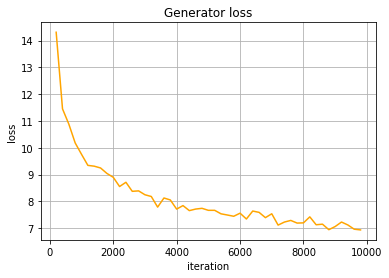

In [17]:
plt.plot(iters[1:], g_loss[1:], 'orange')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Generator loss')
plt.grid()
#plt.savefig('g_loss_apple2orange.png')

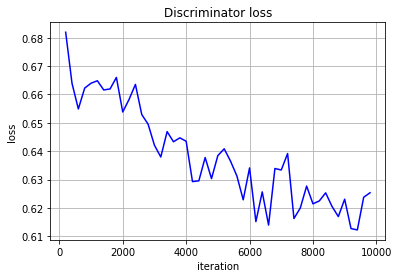

In [18]:
plt.plot(iters[1:], d_loss[1:], 'blue')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Discriminator loss')
plt.grid()
#plt.savefig('d_loss_apple2orange.png')

In [19]:
# torch.save({
#             'generatorAB': generatorAB.state_dict(),
#             'generatorBA': generatorBA.state_dict(),
#             'g_optimizer': g_optimizer.state_dict(),
#             'discriminatorA': discriminatorA.state_dict(),
#             'dA_optimizer': dA_optimizer.state_dict(),
#             'discriminatorB': discriminatorB.state_dict(),
#             'dB_optimizer': dB_optimizer.state_dict()
#         }, "cycleGAN_e20.pth")

In [20]:
# torch.save(generatorAB, 'generatorAB_e20.pt')
# torch.save(generatorBA, 'generatorBA_e20.pt')
# torch.save(discriminatorB, 'discriminatorB_e20.pt')
# torch.save(discriminatorA, 'discriminatorA_e20.pt')